**Integrantes de la pareja**
- Marlon Jhassir García Velásquez


In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Punto Numero 1

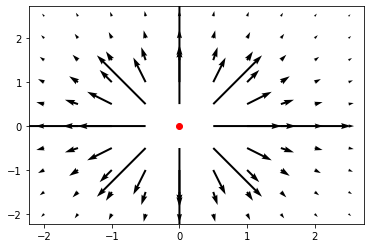

In [ ]:
def E_campo(q, r ):
  """
  Magnitud del campo electrico
  """
  return k*q/r**2

def Campo_fuente(rsource, rp) : 
  """
  Parameter
  ---------
  rsource: numpy array de 2D, con la posicion de la fuente
  rp     : numpy array de 2D, El punto donde se encontrará el campo

  Return
  ----------
  Ex: Componente x del campo electrico
  Ey: Componente y del campo electrico 
  """

  Delta_R =  rp - rsource
  MagDelta_R = np.sqrt(Delta_R[0]**2 + Delta_R[1]**2)
  if MagDelta_R != 0:
    u_R = Delta_R/MagDelta_R
    E = E_campo(1,MagDelta_R ) * u_R
    Ex = E[0]
    Ey = E[1]
    return Ex, Ey
    
  else:
    pass


x  = np.arange(-2, 3, 0.5)
n1 = len(x)
y  = np.arange(-2, 3, 0.5)
n2 = len(y)


rp = np.zeros((n1*n2 , 2))
k = 0
for x_ in (x):
  for y_ in (y):
    rp[k] = np.array([x_, y_])
    k=k+1  

r_source = {"q1": np.array([0., 0.]),"q2":np.array([1,1])} #Posicion de la fuente


E = np.zeros((n1*n2, 2))

for i in range(0, len(rp)):
  E[i] = Campo_fuente(r_source["q1"], rp[i] )

plt.plot(r_source["q1"][0], r_source["q1"][1], "ro" ) 
plt.quiver(rp[:,0], rp[:,1], E[:,0], E[:,1])

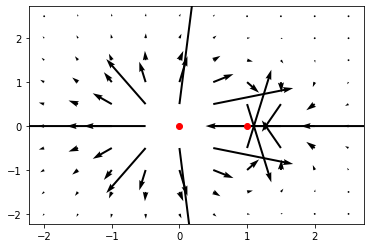

In [ ]:
def E_campo(q, r ):
  """
  Magnitud del campo electrico
  """
  return k*q/r**2

def Campo_fuente(rsource, rp,q) : 
  """
  Parameter
  ---------
  rsource: numpy array de 2D, con la posicion de la fuente
  rp     : numpy array de 2D, El punto donde se encontrará el campo

  Return
  ----------
  Ex: Componente x del campo electrico
  Ey: Componente y del campo electrico 
  """

  Delta_R =  rp - rsource
  MagDelta_R = np.sqrt(Delta_R[0]**2 + Delta_R[1]**2)
  if MagDelta_R != 0:
    u_R = Delta_R/MagDelta_R
    E = E_campo(q,MagDelta_R ) * u_R
    Ex = E[0]
    Ey = E[1]
    return Ex, Ey
  else:
    pass

x  = np.arange(-2, 3, 0.5)
n1 = len(x)
y  = np.arange(-2, 3, 0.5)
n2 = len(y)


rp = np.zeros((n1*n2 , 2))
k = 0
for x_ in (x):
  for y_ in (y):
    rp[k] = np.array([x_, y_])
    k=k+1  


r_source = [np.array([0, 0.]),np.array([1,0])] #Posicion de la fuente
q = [3,-2]
E = np.zeros((2, n1*n2, 2))

for x in range(len(q)):
  for i in range(0, len(rp)):
    E[x][i] = Campo_fuente(r_source[x], rp[i], q[x])

ET = sum(E)

plt.plot(r_source[0][0], r_source[0][1], "ro" ) 
plt.plot(r_source[1][0], r_source[1][1], "ro" ) 
plt.quiver(rp[:,0], rp[:,1], ET[:,0], ET[:,1])



#Punto numero 2

In [159]:
xcesta=3
ycesta=3

def convertir_angulo(a):
  theta = np.pi * a / 180
  return theta

def acertar(vo,xo,yo,theta):
  """
  vo = velocidad inicial
  xo = posición inicial en x
  yo = posición inicial en y
  theta = angulo inicial en grados

  Preferiblemente poner la posición inicia en x a la izquierda de la canasta
  Escribiendola en el lado derecho de esta ocurren algunos errores que 
  sigo pensando en como solucionar
  
  """
  
  if xo > xcesta:
    theta = -theta
  theta = convertir_angulo(theta)

  #Variables 
  vox = vo*np.cos(theta)
  voy = vo*np.sin(theta)
  xg = np.linspace(xo,xcesta,100)
  yg= yo + np.tan(theta)*(xg-xo)-(0.5*9.8*(xg-xo)**2)/(vox**2)
  d = np.abs(xcesta-xo)
  t = (d)/(vox)

  #Se evalua la posición en y del balon cuando x esta en la cesta 
  y = yo + voy*t+ (-9.8 * t**2)/2
  y = round(y,1)   

  #Se grafican los puntos importantes
  plt.figure()
  plt.plot(xg,yg,":", label = "pelota")
  plt.plot(xcesta,xcesta,"bo", label = "cesta")
  plt.plot(xo,yo,"yo", label = "posición inicial")
  plt.axhline(0,0,xcesta)
  plt.axvline(xcesta,0,ycesta)                


  #Se evalua si el balon cumple la condición para pasar por la cesta
  print("la posición de la cesta es: {},{}".format(xcesta,ycesta))
  print(y)
  if y == ycesta:
    print("acerto el disparo")
  else:
    print("fallo")


la posición de la cesta es: 3,3
2.3
fallo


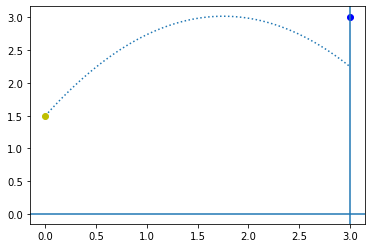

In [157]:
acertar(6.3,0,1.5,60)